# Lecture 12

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import rcParams
rcParams['animation.html'] = 'jshtml'
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4
import time
import os
import glob

## AOM 3.6 Inclusion of Variable Density

### 3.6.1 The Governing Equations

The governing equations are

$$\begin{align}
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + w \frac{\partial u}{\partial z} &= - \frac{1}{\rho_0}\frac{\partial (p+q)}{\partial x} \\
\frac{\partial w}{\partial t} + u\frac{\partial w}{\partial x} + w \frac{\partial w}{\partial z} &= -\frac{1}{\rho_0}\frac{\partial q}{\partial z} \\
\frac{\partial \rho}{\partial t} + u\frac{\partial \rho}{\partial x} + w \frac{\partial \rho}{\partial z} &= \frac{\partial}{\partial x} \left( K_h \frac{\partial \rho}{\partial x} \right ) + \frac{\partial}{\partial z} \left( K_z \frac{\partial \rho}{\partial z} \right )\\
\frac{\partial u}{\partial x} + \frac{\partial w}{\partial z} &= 0
\end{align}$$

where pressure has been split into a hydrostatic, $p$, and non-hydrostatic, $q$, components:

$$\begin{align}
\frac{\partial q_s}{\partial t} &= -\rho_0 g \frac{\partial (h \langle u \rangle)}{\partial x} \\
\frac{\partial p}{\partial z} &= - \frac{(\rho - \rho_0)}{\rho_0} g
\end{align}$$

where $p=0$ at the sea surface.  

Notice the reduced gravity force $- \frac{(\rho - \rho_0)}{\rho_0} g$ which is often shown in the vertical momentum equation is now implicitly included in the horizontal momentum equation via $p$.

### 3.6.3 Discretisation of the Advection Terms

As we introduced for Eulerian tracers, the advection terms of the form

$$\frac{\partial B}{\partial t} + u \frac{\partial B}{\partial x} + w \frac{\partial B}{\partial z}$$

are handled by considering a the flow through a control volume (see AOM Fig 3.12) and 
are solved using a *Total Variation Diminishing* (TVD) advection scheme.

### 3.6.4 Implementation of Density Diffusion

Diffusion is can be treated with explicit finite differences:

$$\begin{align}
\frac{\partial}{\partial x}\left( K_h \frac{\partial \rho}{\partial x} \right) &= \left.\left[ K_h^e \left(\rho_{i, k+1} - \rho_{i,k} \right)  -  K_h^w \left(\rho_{i, k} - \rho_{i,k-1} \right)\right] \middle / \left( \Delta x \right)^2 \right.\\
\frac{\partial}{\partial z}\left( K_z \frac{\partial \rho}{\partial z} \right) &= \left.\left[ K_z^+ \left(\rho_{i-1, k} - \rho_{i,k} \right)  -  K_z^- \left(\rho_{i, k} - \rho_{i+1,k} \right)\right] \middle / \left( \Delta z \right)^2 \right.\\
\end{align}$$

See AOM Fig 3.13.

## AOM 3.7 Exercise 4: Density-Driven Flows

### 3.7.1 Aim

The aim of this exercise is to apply the vertical ocean-slice model in a study of
bottom-arrested density-driven flows over variable bottom topography.

### 3.7.2 Task Description

Consider a closed channel, 500 m long and 100 m deep, resolved by grid spacings
of Δx = 5 m and Δz = 2 m. The
model is forced via prescription of a layer of dense water that initially leans against
the left boundary, as shown in Fig. 3.14. This layer is initially 100 m thick and 50 m
wide. Its density is 1 kg/m$^3$ greater compared with ambient water having a density
of $\rho_0$ = 1,028 kg/m$^3$. Owing to initially unbalanced lateral pressure gradients, this
layer will spread along the sea floor with the aim to achieve a final state at rest void
of any horizontal density gradients.

### 3.7.3 Theory

Conversion of potential energy to kinetic energy according to the Bernoulli equation

$$ 0.5 u^2 + g' h = g'h_0$$

Solve for $u$ to get

$$ u = \sqrt{2 g' (h_0 - h) } $$

In [6]:
ds.close()

In [7]:
filename = 'src/AOM_Ex4/output.nc'
ds = xr.open_dataset(filename)

In [8]:
ds

<xarray.Dataset>
Dimensions:  (time: 101, x: 101, z: 51)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-01T00:50:00
  * x        (x) float32 2.5 7.5 12.5 17.5 22.5 ... 487.5 492.5 497.5 502.5
  * z        (z) float32 1.0 3.0 5.0 7.0 9.0 11.0 ... 93.0 95.0 97.0 99.0 101.0
Data variables:
    u        (time, x, z) float32 ...
    w        (time, x, z) float32 ...
    p        (time, x, z) float32 ...
    q        (time, x, z) float32 ...
    rho      (time, x, z) float32 ...

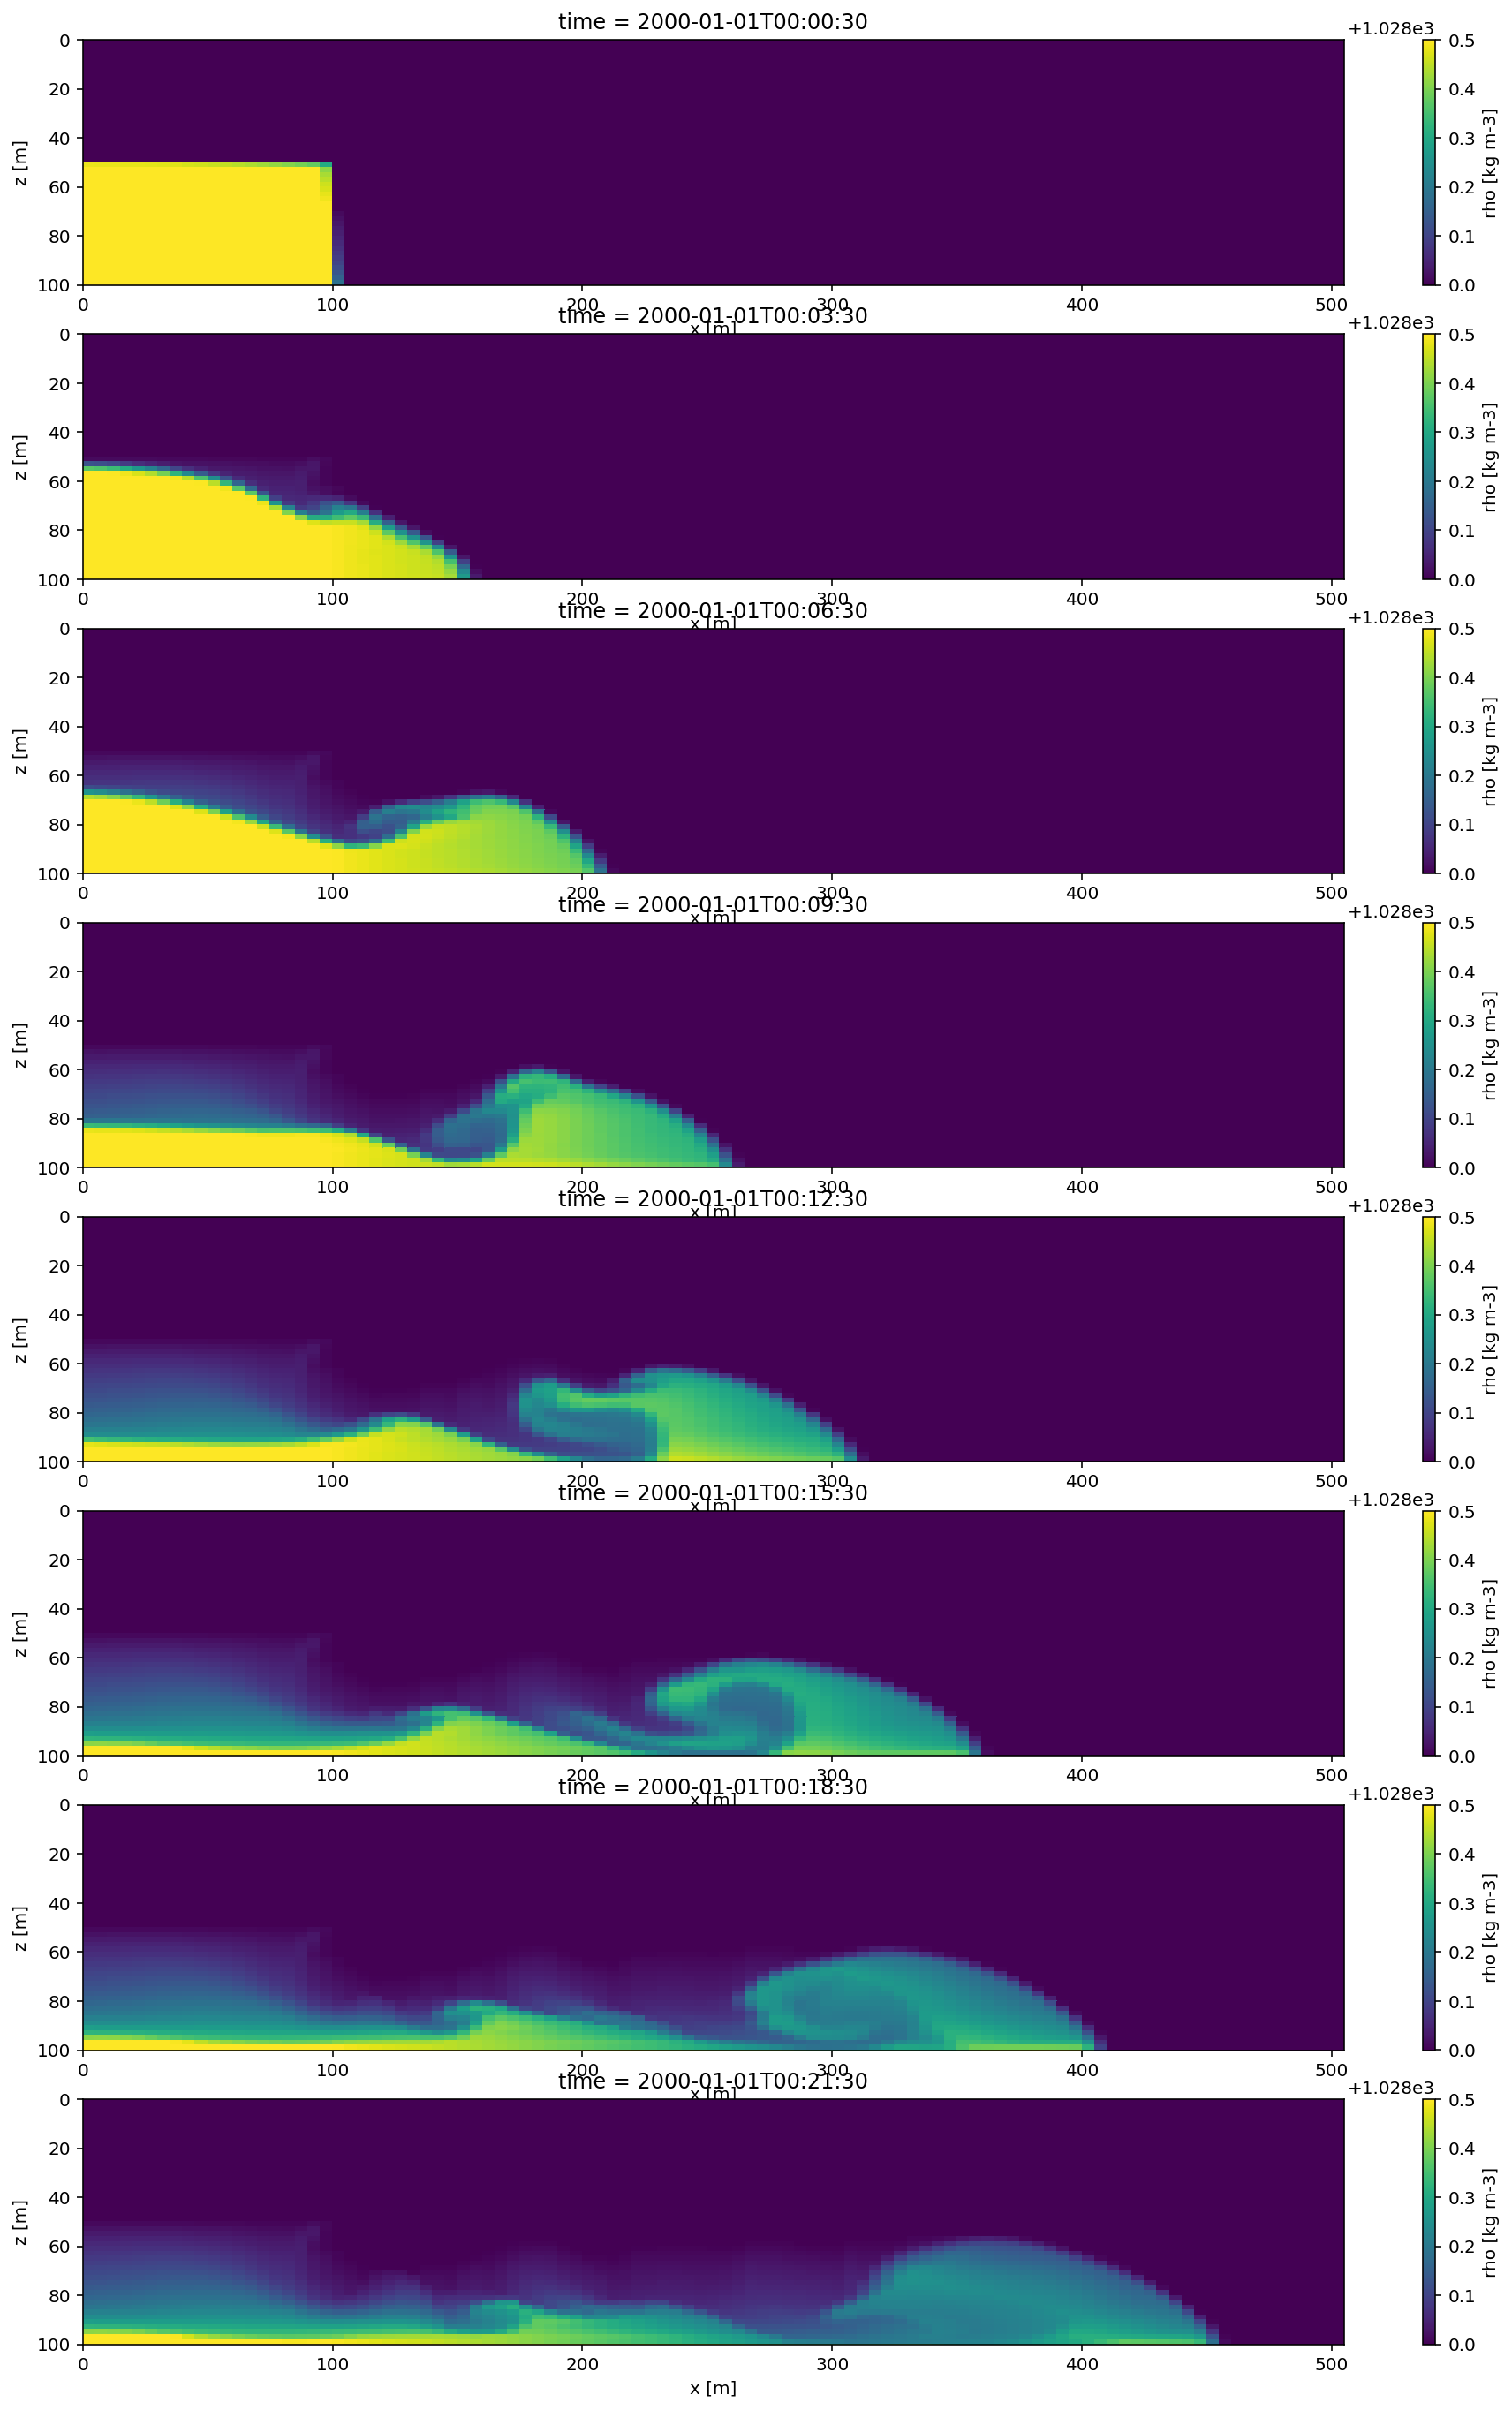

In [49]:
n = 8
fig, axes = plt.subplots(n, 1, figsize=(16, 24))

for i in range(n):
    ds.rho[6*i+1].plot(x='x', ax=axes[i])
    axes[i].set_ylim(100, 0)


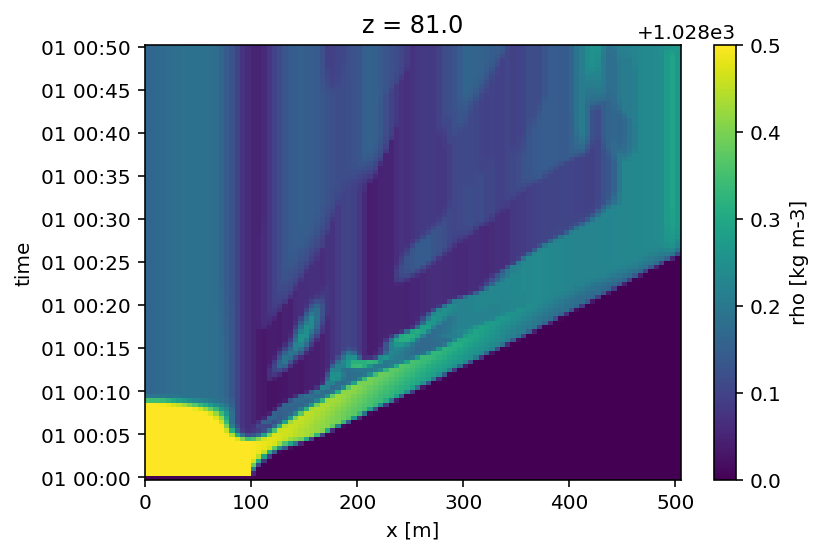

In [54]:
ds.rho.sel(z=80, method='nearest').plot()

Comparison with theory: (Note difference with textbook figure)

In [64]:
gprime = 1 * 9.81 / 1028
h0 = 100
h = 40
utheory = np.sqrt(2*gprime * ( h0 - h))
utheory

1.0701103619582553

In [60]:
400 / (20*60)

0.3333333333333333

>  **Problem 19**: Gravity Current
>
> Complete 3.7.6 by simulating a gravity current with a initial plume that is less density than the ambient.  Also, modify the code so that it uses the rigid-lid approximation. 

## AOM 3.10 Mechanical Turbulence

### 3.10.1 Kelvin-Helmholtz Instability

See Fig 3.23

## AOM 3.11 Exercise 6: Kelvin-Helmholtz Instability

In [69]:
filename = 'src/AOM_Ex6/output.nc'
ds = xr.open_dataset(filename)

In [75]:
ds

<xarray.Dataset>
Dimensions:  (time: 161, x: 101, z: 51)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-01T01:40:00
  * x        (x) float32 2.5 7.5 12.5 17.5 22.5 ... 487.5 492.5 497.5 502.5
  * z        (z) float32 1.0 3.0 5.0 7.0 9.0 11.0 ... 93.0 95.0 97.0 99.0 101.0
Data variables:
    u        (time, x, z) float32 ...
    w        (time, x, z) float32 ...
    p        (time, x, z) float32 ...
    q        (time, x, z) float32 ...
    rho      (time, x, z) float32 ...

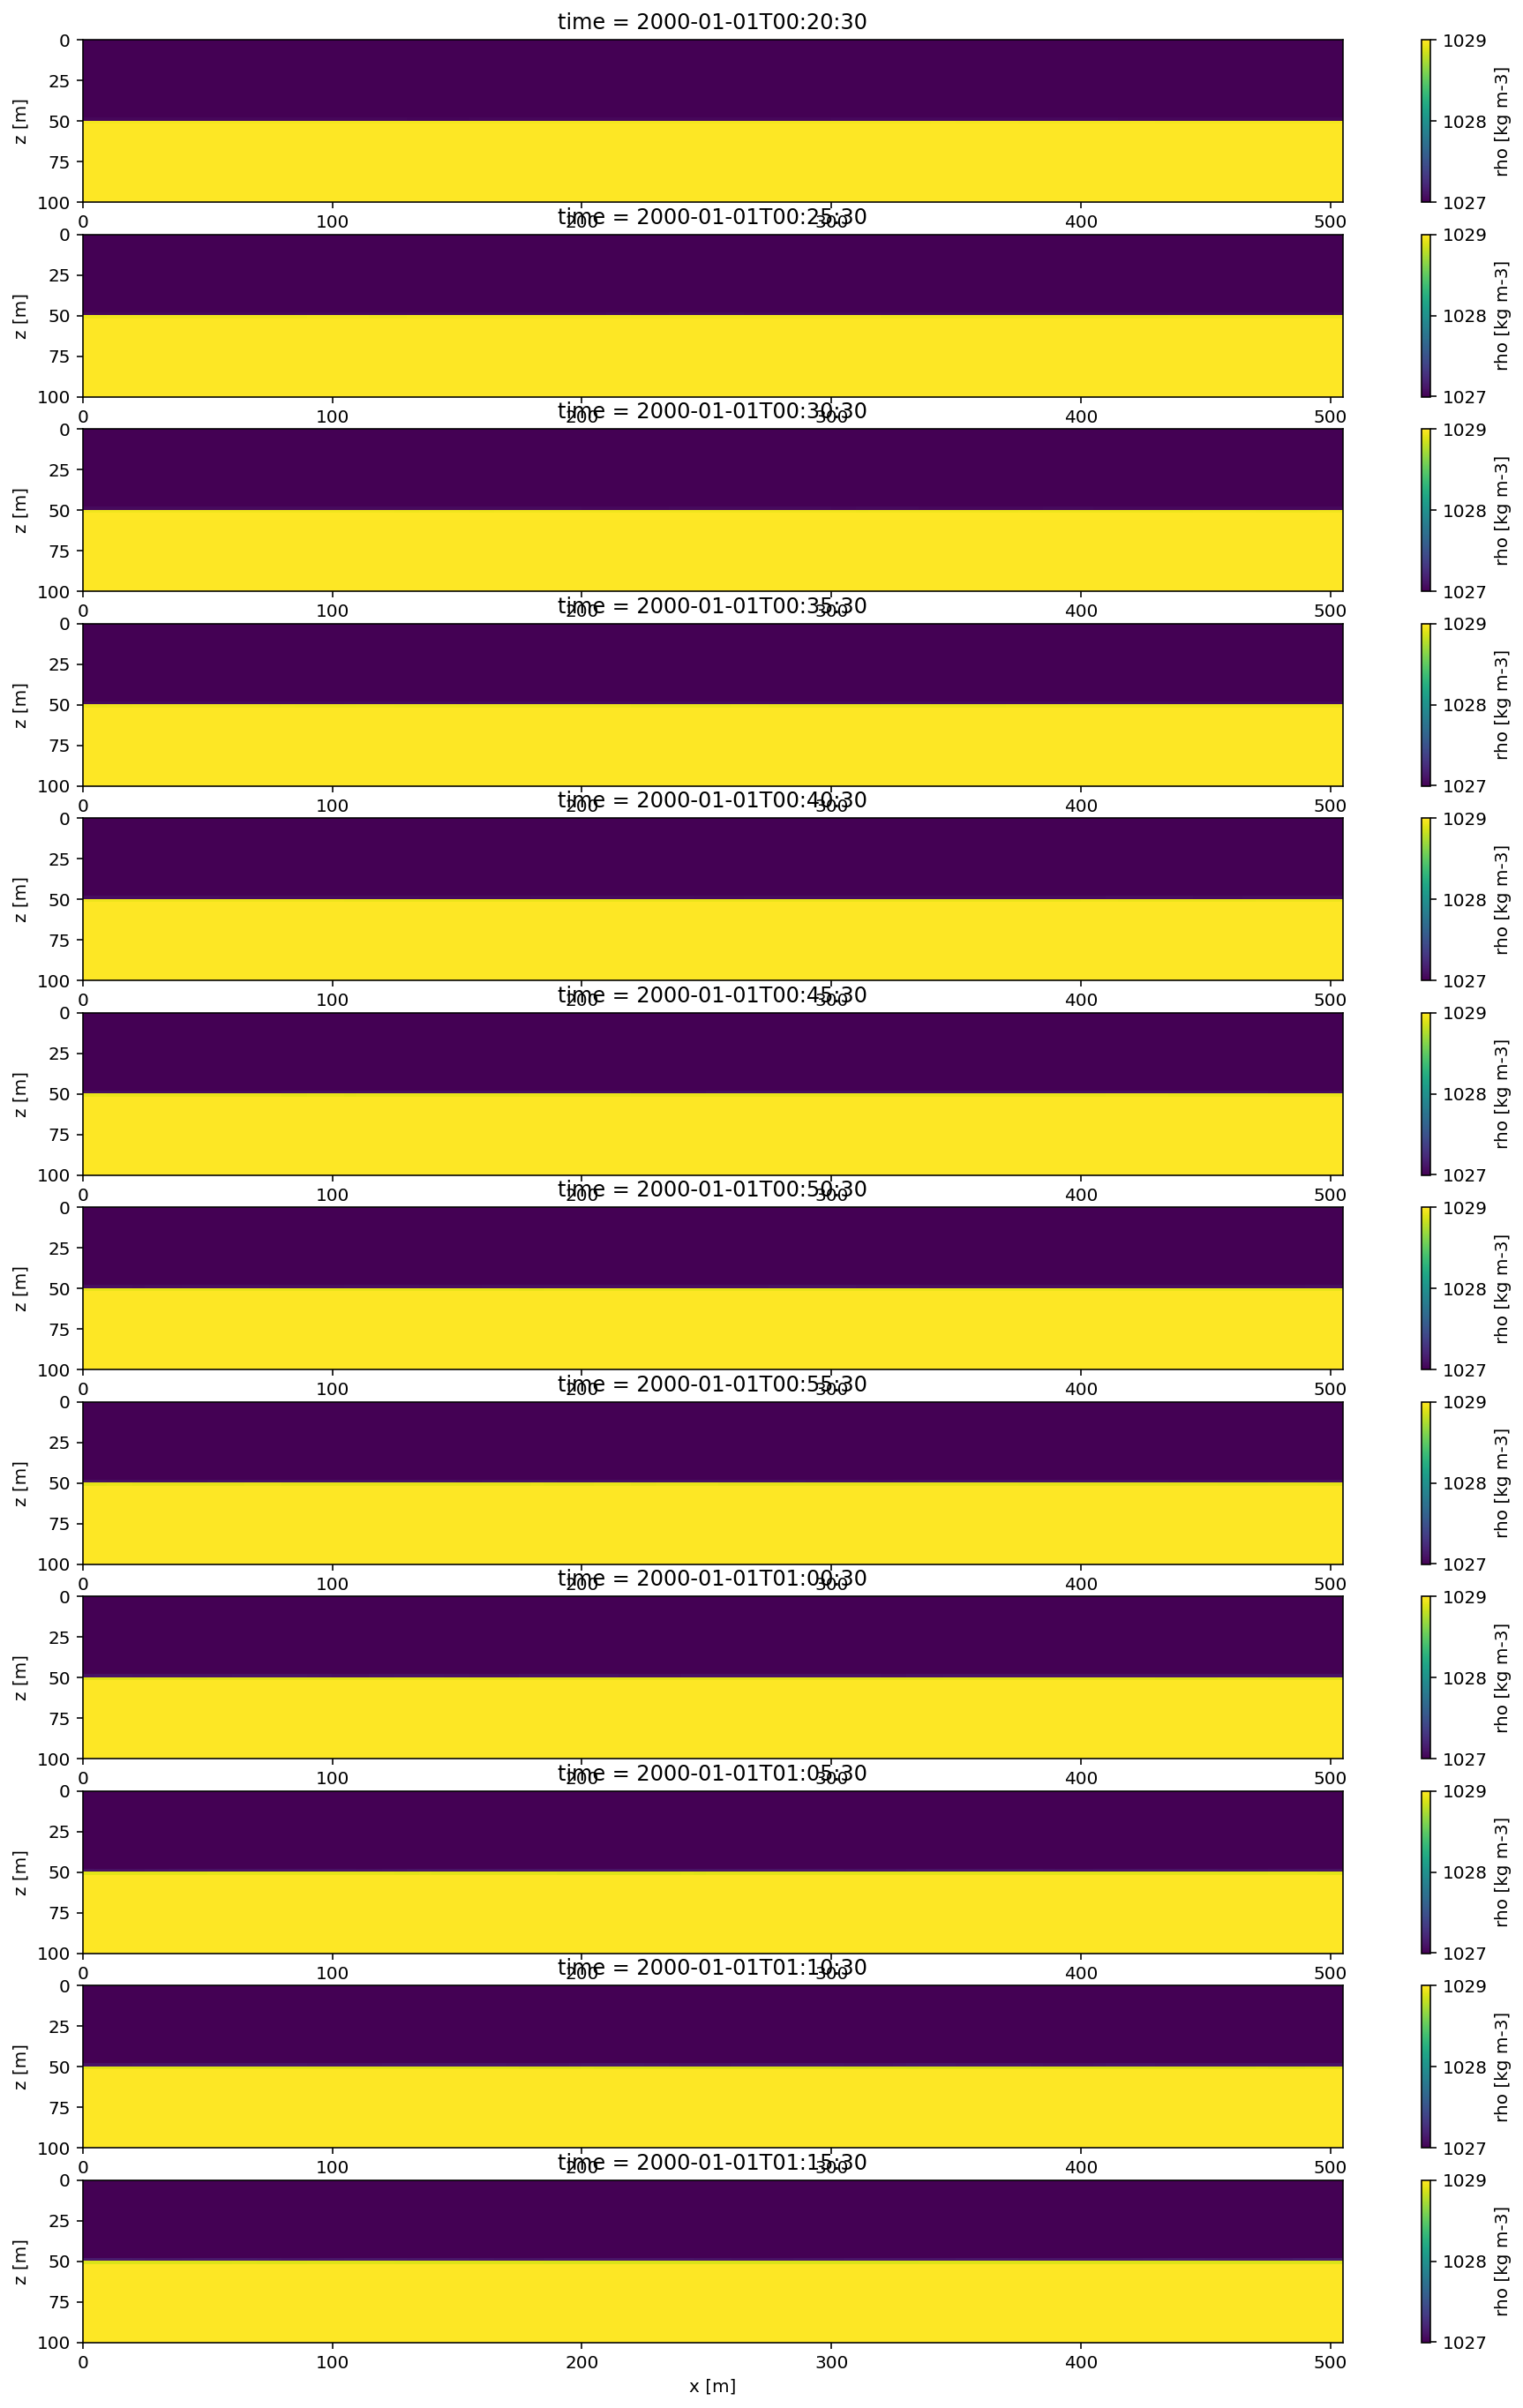

In [88]:
n = 12
fig, axes = plt.subplots(n, 1, figsize=(16, 24))

for i in range(n):
    ds.rho[10*i+1].plot(x='x', ax=axes[i])
    axes[i].set_ylim(100, 0)

> **Problem 20**: Kelvin-Helmholtz Instability
>
> Complete 3.11.5 Additional Exercise for the Reader

## AOM 3.14 Oceanic Convection

## AOM 3.15 Exercise 8: Free convection

## AOM 3.15 Exercise 9: Convective Entrainment

## AOM 3.17 Exercise 10: Slope Convection near the Shore

> Problem 21: Intrusive plume

## AOM 3.21 Tilted Coordinate Systems



## AOM 3.22 Exercise 13: Stratified Flows on a Slope

## AOM 3.23 Estuaries



## AOM 3.24 Exercise 14: Positive Estuaries

## AOM 3.25 Exercise 15: Inverse Estuaries

> Problem 22: Estuary with a  temporally varying evaporation rate 

# AOM Chapter 4: 2.5D Vertical Slice Modelling

## AOM 4.1 The Basis


## AOM 4.2 Exercise 16: Geostrophic Adjustment


## AOM 4.3 Exercise 17: Tidal Mixing Fronts

> Problem 23: Tidal Mixing Front

## AOM 4.4 Coastal upwelling

## AOM 4.5 Exercise 18: Coastal Upwelling and Downwelling

> Problem 24: Coastal Upwelling

## AOM 4.6 Exercise 19: Ekman Pumping

# AOM Chapter 5: 3D Level Modelling

## AOM Exercise 22: Exchange Flow Through a Strait

Lusie, Monday April 5


## AOM Exercise 23: Exchange Flow Through a Strait

Jamseena, Thursday April 8